## <center>PCA in Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Admission_Predict_Ver1.1.csv')

In [3]:
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
data.shape

(500, 9)

In [7]:
data.isnull().mean()*100

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [8]:
data.duplicated().sum()

0

In [9]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
data.rename(columns={'Serial No':'SerialNo','GRE Score':'GREScore','TOEFL Score':'TOEFLScore','University Rating':'UniversityRating','Chance of Admit ':'Chance_of_Admit'},inplace=True)

In [11]:
data.sample()

,Serial No.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Chance_of_Admit
360,361,322,110,3,4.0,5.0,8.64,1,0.85


In [12]:
data.drop(columns='Serial No.', inplace=True)

#### Selecting features and Targets

In [13]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

#### Standardizing the data

In [14]:
SC = StandardScaler()

In [15]:
x_scaled = SC.fit_transform(x)

In [16]:
pca_model = PCA().fit(x_scaled)

In [17]:
pca_model.explained_variance_ratio_

array([0.67519343, 0.10596446, 0.08023255, 0.0543379 , 0.03766808,
       0.02546844, 0.02113513])

In [18]:
pca_model.explained_variance_ratio_.cumsum()

array([0.67519343, 0.78115789, 0.86139044, 0.91572834, 0.95339642,
       0.97886487, 1.        ])

In [19]:
pca_model.singular_values_

array([48.61251905, 19.25813119, 16.75750346, 13.79067208, 11.4820858 ,
        9.44137474,  8.60075376])

### Screeplot

The screeplot is used to determine the number of principal components to keep in a PCA.

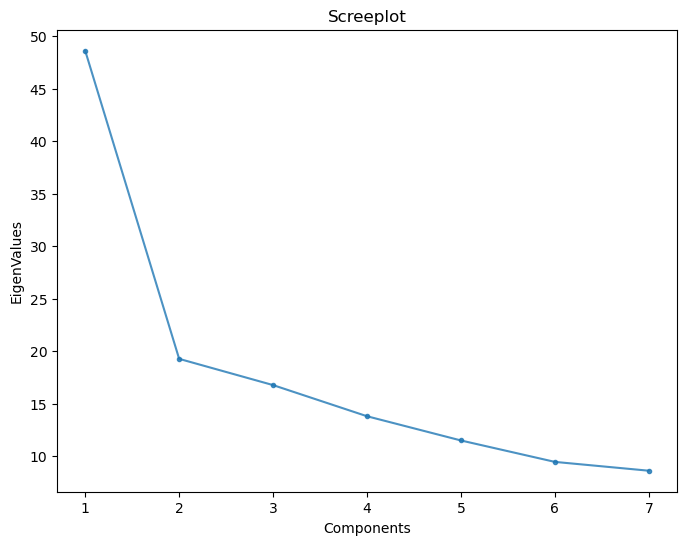

In [20]:
fig = plt.figure(figsize = (8,6))
plt.plot(range(1,len(pca_model.singular_values_)+1),pca_model.singular_values_,alpha=0.8,marker='.')
y_label = plt.ylabel('EigenValues')
x_label = plt.xlabel('Components')
plt.title('Screeplot')
plt.show()

I am choosing 6 components

### % Of Explained Variance by Component

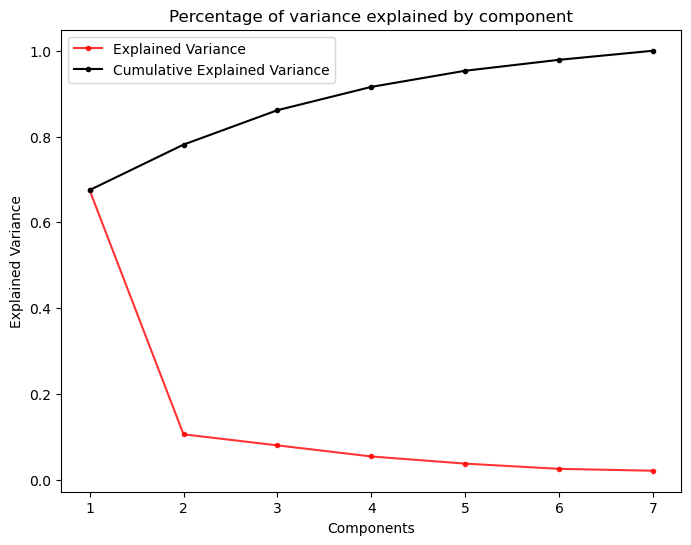

In [21]:
fig = plt.figure(figsize=(8, 6))
plt.plot(range(1,len(pca_model.explained_variance_ratio_)+1), pca_model.explained_variance_ratio_,marker = '.', alpha = 0.8, label = 'Explained Variance', color = 'red')
y_label = plt.ylabel('Explained Variance')
x_label = plt.xlabel('Components')
plt.plot(range(1, len(pca_model.explained_variance_ratio_)+1), pca_model.explained_variance_ratio_.cumsum(),marker = '.', label = 'Cumulative Explained Variance', color = 'black')
plt.legend()
plt.title("Percentage of variance explained by component")
plt.show()         

In [22]:
pca = PCA(n_components=6)

In [23]:
x_pca = pca.fit_transform(x_scaled)

In [28]:
x_pca.shape

(500, 6)

#### Splitting the data into training and testing sets

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state = 42, shuffle=True)

#### Model building

##### Initialising the model

In [31]:
model = LinearRegression()

##### Fitting the model with training data

In [32]:
model.fit(x_train, y_train)

LinearRegression()

##### Predicting using the test data

In [33]:
y_pred = model.predict(x_test)

##### Evaluating the accuracy

In [34]:
r2_score(y_test, y_pred)

0.8016484617313252

##### Testing accuracy

In [35]:
model.score(x_test, y_test)

0.8016484617313252

##### Training accuracy

In [36]:
model.score(x_train, y_train)

0.8167772157525058

#### MAE

In [37]:
mean_absolute_error(y_test, y_pred)

0.04539884680969553

##### MSE

In [38]:
mean_squared_error(y_test, y_pred)

0.0040562889575944

##### Root Mean Squared Error

In [39]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.06368900185741963

#### Creating a dataframe with y_test and y_pred

In [40]:
OUTPUT = pd.DataFrame(zip(y_test, y_pred), columns=['ACTUAL', 'PREDICTION'])

In [41]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,0.93,0.910980
1,0.84,0.781616
2,0.39,0.590560
3,0.77,0.696344
4,0.74,0.811888


#### Plotting the result

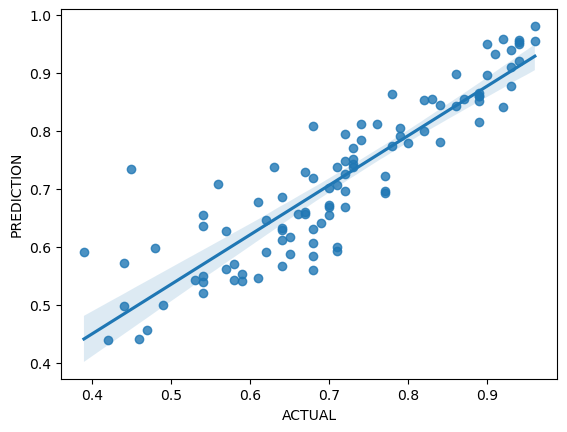

In [42]:
sns.regplot(data=OUTPUT, x='ACTUAL', y='PREDICTION')
plt.show()

#### Model building

##### Creating a dictionary of models for iterative purpose

In [43]:
models = {
"LinearRegression": LinearRegression(),
"Ridge":Ridge(),
'Lasso':Lasso(),
"LinearSVR":LinearSVR(random_state=42),
"DecisionTreeRegressor":DecisionTreeRegressor(random_state=42),
"GradientBoostingRegressor":GradientBoostingRegressor(random_state=42),
"AdaBoostRegressor":AdaBoostRegressor(random_state=42),
"RandomForestRegressor":RandomForestRegressor(random_state=42)
}

#### Using a for loop for model training and testing

In [44]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score = model.score(x_test, y_test)*100
    score = r2_score(y_test, model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ", training_score)
    print("testing_score: ", testing_score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse_test: ", rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  80.16484617313252
training_score:  81.67772157525059
testing_score:  80.16484617313252
mae:  0.04539884680969553
mse:  0.0040562889575944
rmse_test:  0.06368900185741963
****************************************************************************************************
model trained with Ridge
r2score:  80.1841490387135
training_score:  81.67743196595917
testing_score:  80.1841490387135
mae:  0.04536260994281517
mse:  0.004052341521583089
rmse_test:  0.0636580043795208
****************************************************************************************************
model trained with Lasso
r2score:  -0.724844132029312
training_score:  0.0
testing_score:  -0.724844132029312
mae:  0.116268
mse:  0.020598230624999995
rmse_test:  0.1435208369018241
****************************************************************************************************
model trained with LinearSVR
r2score:  80.04939436839595
training_score:  81.32120922042618
te

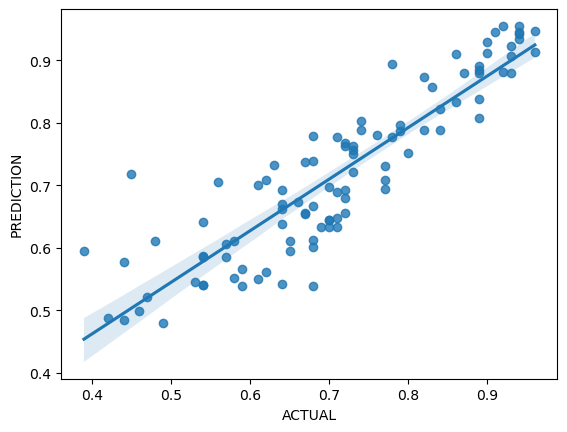

In [46]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
OUTPUT = pd.DataFrame(zip(y_test, y_pred), columns=['ACTUAL', 'PREDICTION'])
OUTPUT.head()
sns.regplot(data=OUTPUT, x='ACTUAL', y='PREDICTION')
plt.show()